Exponential Scheduling
- It is a method wher we gradually reduce the learning rate during training to allow the model to converge more smoothly as it approaches a solution.

Exponential Decay function
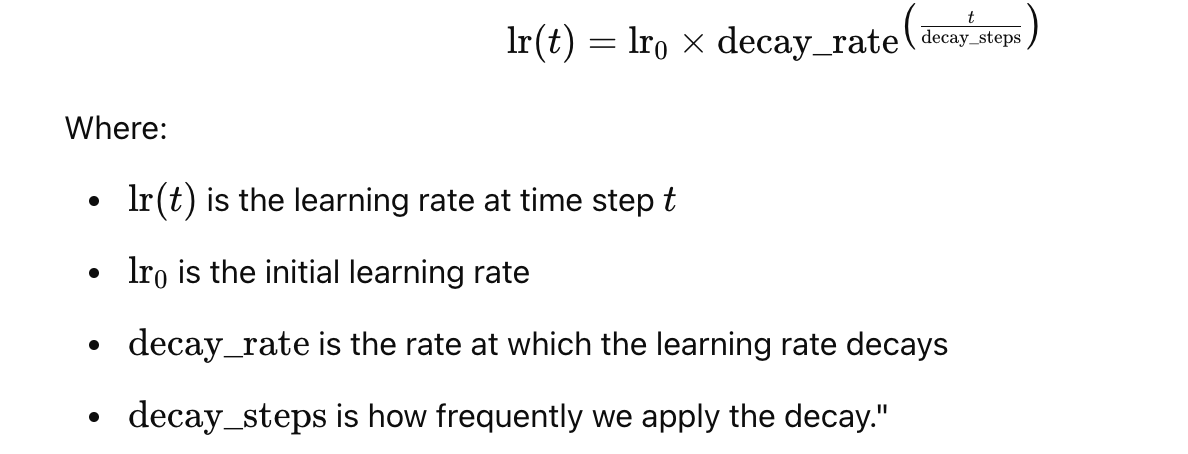

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Hyperparamters
initial_learning_rate = 0.1
decay_rate = 0.96
decat_step = 1000
global_step = tf.Variable(0, trainable=False, dytpe = tf.int64)


In [3]:
# Define the exponential Learning schedule
learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=decat_step,
    decay_rate=decay_rate,
    staircase=  True)


In [4]:
# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# compile
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
# simulate learning steps
steps = np.arange(0,5000,1)
learning_rates = [learning_rate_schedule(step).numpy() for step in steps]

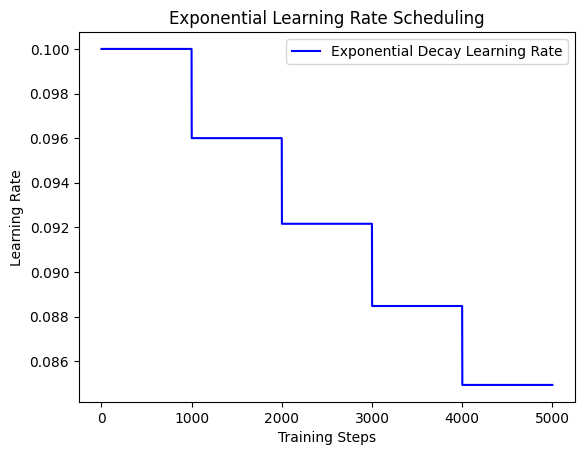

In [8]:
# Plot the learning rate schedule
plt.plot(steps, learning_rates, label='Exponential Decay Learning Rate', color='b')
plt.title('Exponential Learning Rate Scheduling')
plt.xlabel('Training Steps')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()

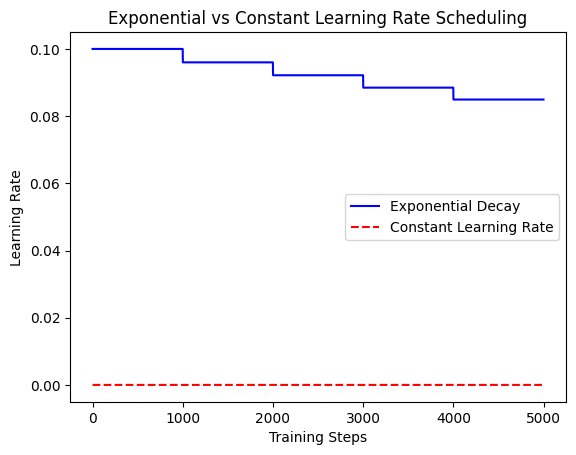

In [10]:
# Constant Learning Rate
constant_learning_rate = np.full_like(steps, initial_learning_rate)

# Plot both learning rates
plt.plot(steps, learning_rates, label='Exponential Decay', color='b')
plt.plot(steps, constant_learning_rate, label='Constant Learning Rate', color='r', linestyle='--')
plt.title('Exponential vs Constant Learning Rate Scheduling')
plt.xlabel('Training Steps')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()


In [10]:
|